In [1]:
import xarray as xr

In [13]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [14]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [15]:
ds.sel(longitude=-82)

<xarray.Dataset>
Dimensions:    (latitude: 89, time: 500)
Coordinates:
    longitude  float32 -82.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude) float32 ...
    skt        (time, latitude) float32 ...
    tp         (time, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [16]:
ds.sel(longitude=-82, latitude=5.75, time='2018-01-01')

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float32 -82.0
    latitude   float32 5.75
    expver     int32 1
    time       datetime64[ns] 2018-01-01
Data variables:
    lai_hv     float32 ...
    skt        float32 ...
    tp         float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [17]:
#ds.sel(longitude=99)

In [18]:
ds.sel(longitude=99, method='nearest')

<xarray.Dataset>
Dimensions:    (latitude: 89, time: 500)
Coordinates:
    longitude  float32 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude) float32 ...
    skt        (time, latitude) float32 ...
    tp         (time, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [19]:
ds.sel(latitude=[-16,-15], longitude=[-46,-47], method='nearest')

<xarray.Dataset>
Dimensions:    (longitude: 2, latitude: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -46.75 -47.0
  * latitude   (latitude) float32 -16.0 -15.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [20]:
ds.isel(latitude=0, longitude=0)

<xarray.Dataset>
Dimensions:    (time: 500)
Coordinates:
    longitude  float32 -82.0
    latitude   float32 6.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time) float32 ...
    skt        (time) float32 ...
    tp         (time) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [21]:
QUERY = ds.longitude < -64
QUERY = QUERY & (ds.latitude > -8)

#ds.where(QUERY, drop = True)

(array([1.180000e+02, 3.424000e+03, 3.899800e+04, 1.086510e+05,
        1.537960e+05, 3.378610e+05, 1.026602e+06, 4.416252e+06,
        2.071530e+05, 8.690000e+02]),
 array([266.84399414, 271.17169189, 275.49935913, 279.82705688,
        284.15472412, 288.48242188, 292.81011963, 297.13778687,
        301.46548462, 305.79315186, 310.12084961]),
 <BarContainer object of 10 artists>)

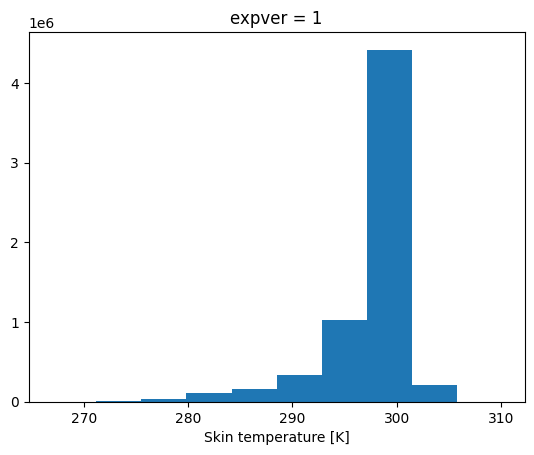

In [22]:
ds.skt.plot()

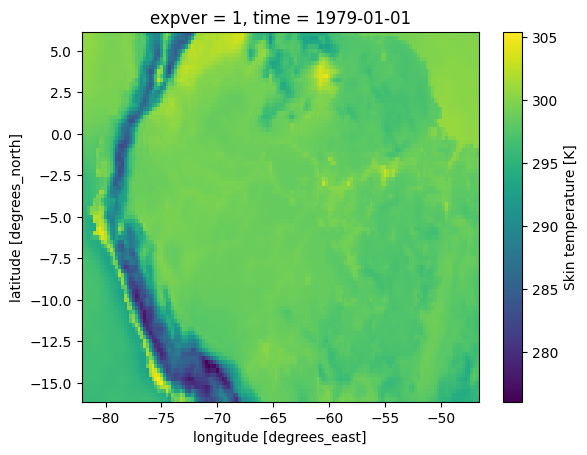

In [23]:
ds.isel(time=0).skt.plot()

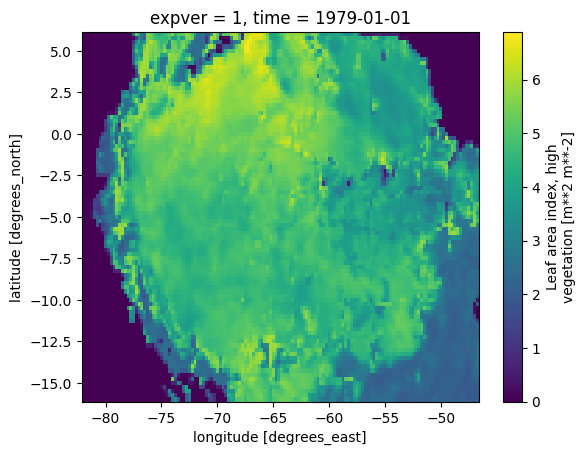

In [25]:
ds.isel(time=0).lai_hv.plot()

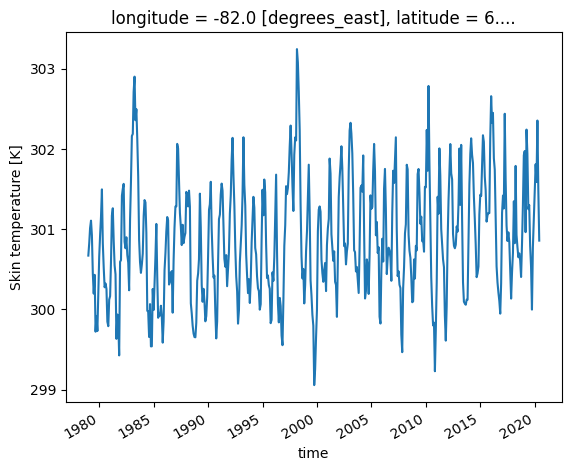

In [26]:
ds.isel(longitude=0, latitude=0).skt.plot()

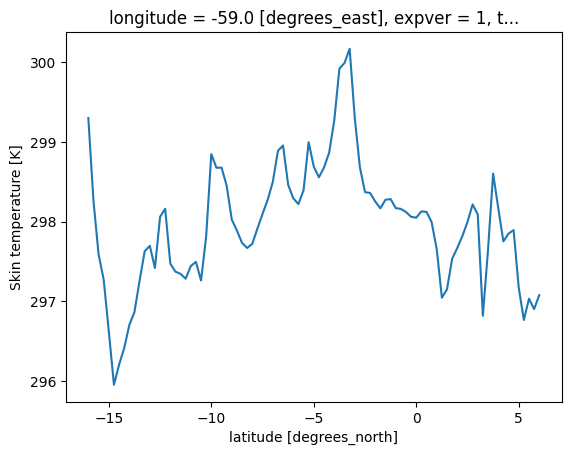

In [27]:
ds.isel(time=0).sel(longitude=-59, method='nearest').skt.plot()

In [28]:
tempo_change = (ds.skt.sel(time='2019-01-01')-ds.skt.sel(time='1979-01-01'))
tempo_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[ 1.2527466 ,  1.277832  ,  1.2758484 , ...,  0.03961182,
         0.1076355 ,  0.19018555],
       [ 1.1880188 ,  1.197937  ,  1.1669006 , ..., -0.01123047,
         0.01257324,  0.08056641],
       [ 1.0024719 ,  0.996521  ,  0.9423828 , ..., -0.04425049,
        -0.05215454, -0.00726318],
       ...,
       [-0.3295288 , -0.3163147 , -0.27075195, ...,  3.6135864 ,
         3.400299  ,  3.5396423 ],
       [-0.3942566 , -0.38238525, -0.36849976, ...,  3.4597168 ,
         3.4241028 ,  3.6142578 ],
       [-0.45632935, -0.5249939 , -0.51708984, ...,  3.402954  ,
         3.262268  ,  3.3210754 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

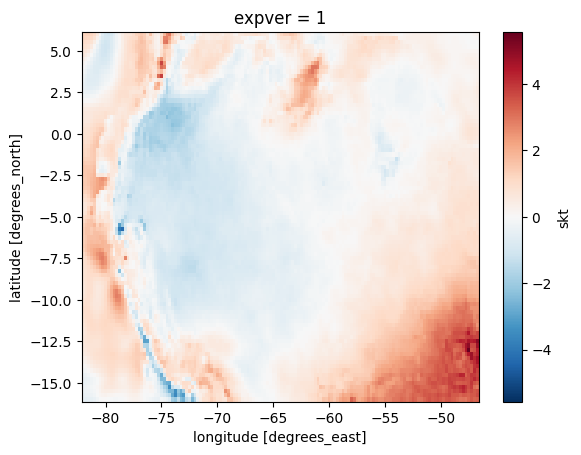

In [29]:
tempo_change.plot()

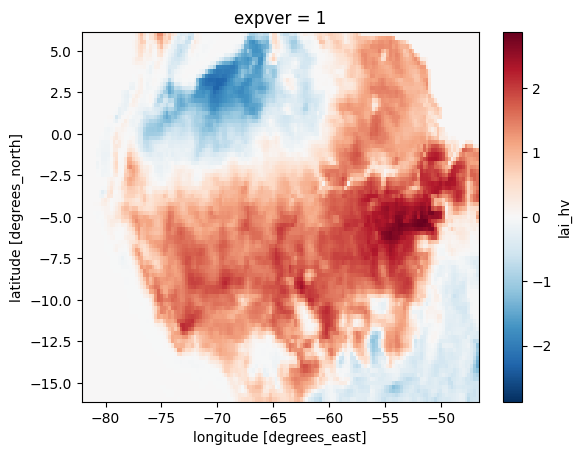

In [31]:
sazonal_change = (ds.lai_hv.sel(time='2019-07-01')-ds.lai_hv.sel(time='2019-01-01'))
sazonal_change.plot()